<a href="https://colab.research.google.com/github/Pathin220/4105_ML/blob/main/4105_Hw_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [289]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn.datasets import load_breast_cancer
import warnings
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
import random

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [290]:
#Problem 1
file_path = '/content/drive/My Drive/Machine Learning/diabetes.csv'
df_1 = pd.DataFrame(pd.read_csv(file_path))
df_1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [291]:
df_1.shape

(768, 9)

In [292]:
#In the dataset we’ll consider Pregnancies, Glucose, Blood Pressure, Skin Thickness, Insulin, BMI, Diabetes Pedigree Function and Age as the Independent variables
X = df_1.iloc[:, [0,1,2,3,4,5,6,7]].values
Y = df_1.iloc[:, 8].values

In [293]:
#Feature Scaling for better accuracy
scal_X = StandardScaler()
X = scal_X.fit_transform(X)
X[0:10]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ],
       [ 0.3429808 , -0.15318486,  0.25303625, -1.28821221, -0.69289057,
        -0.81134119, -0.81807858, -0.27575966],
       [-0.25095213, -1.34247638, -0.98770975,  0.71908574,  0.07120427,
        -0.12597727, -0.676133  , -0.61611067],
       [ 1.82781311, -0.184482  , -3.57259724, -1.28821221, -0.69289057,
         0.41977549, -1.02042653, -0.36084741],
       [-0.54791859,  2.38188392

In [294]:
#Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state = 0)

In [295]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)


LogisticRegression(random_state=0)

In [296]:

Y_pred = classifier.predict(X_test)
Y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [297]:
cf_matrix = confusion_matrix(Y_test, Y_pred)
cf_matrix

array([[98,  9],
       [18, 29]])

In [298]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.8246753246753247
Precision: 0.7631578947368421
Recall: 0.6170212765957447


Text(0.5, 427.9555555555555, 'Predicted label')

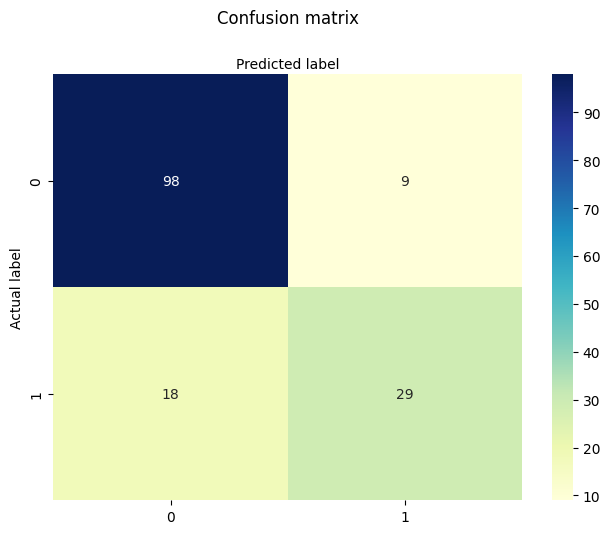

In [299]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [300]:
#Problem 2
file_path = '/content/drive/My Drive/Machine Learning/cancer.csv'
df_2 = pd.DataFrame(pd.read_csv(file_path))
df_2.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [301]:
breast = load_breast_cancer()
X = breast.data
Y = breast.target

In [302]:

X.shape

(569, 30)

In [303]:
Y.shape

(569,)

In [304]:
#Feature Scaling for better accuracy
scal_X = StandardScaler()
X = scal_X.fit_transform(X)


In [305]:
#Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state = 0)


In [306]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [307]:
Y_pred = classifier.predict(X_test)
Y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1])

In [308]:
cf_matrix = confusion_matrix(Y_test, Y_pred)
cf_matrix


array([[45,  2],
       [ 2, 65]])

In [309]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.9649122807017544
Precision: 0.9701492537313433
Recall: 0.9701492537313433


Text(0.5, 427.9555555555555, 'Predicted label')

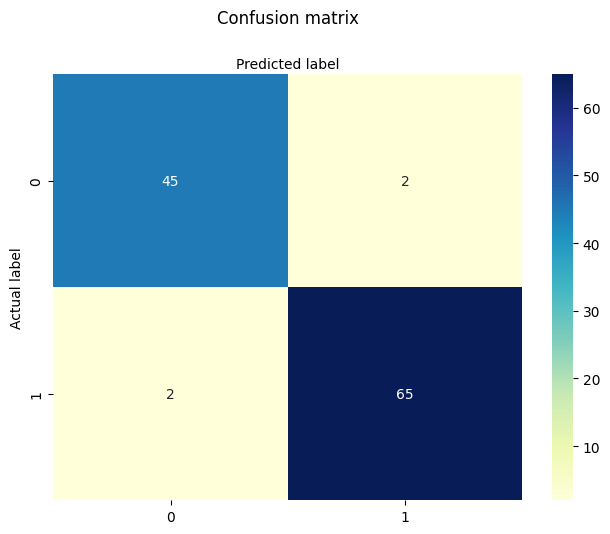

In [310]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [311]:
breast = load_breast_cancer()
X = breast.data
Y = breast.target


In [312]:
#Feature Scaling for better accuracy
scal_X = StandardScaler()
X = scal_X.fit_transform(X)

In [313]:
#Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state = 0)


In [314]:

cf_matrix = confusion_matrix(Y_test, Y_pred)
cf_matrix

array([[45,  2],
       [ 2, 65]])

In [315]:
lr = LogisticRegression(solver='newton-cg', class_weight='balanced')
lr.fit(X_train, Y_train)

# Predicting on the test data
Y_Pred = lr.predict(X_test)

# performance
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.9649122807017544
Precision: 0.9701492537313433
Recall: 0.9701492537313433


Text(0.5, 427.9555555555555, 'Predicted label')

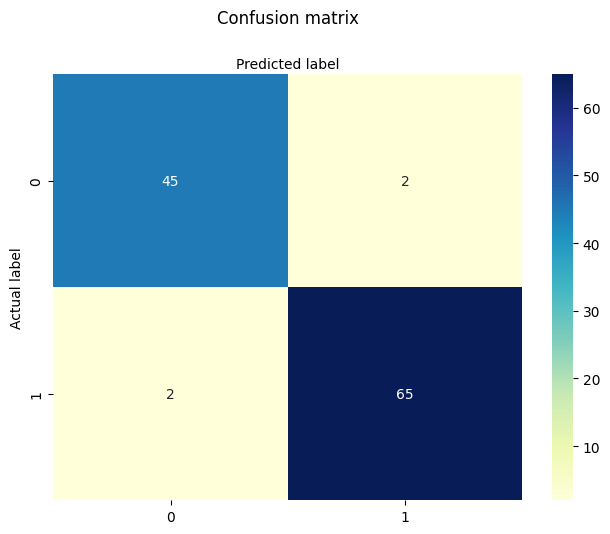

In [316]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [317]:
#Problem 3
dataset = datasets.load_breast_cancer()
model = GaussianNB()
model.fit(dataset.data,dataset.target)

GaussianNB()

In [318]:

predicted = model.predict(dataset.data)
expected = dataset.target

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))


              precision    recall  f1-score   support

           0       0.95      0.89      0.92       212
           1       0.94      0.97      0.95       357

    accuracy                           0.94       569
   macro avg       0.94      0.93      0.94       569
weighted avg       0.94      0.94      0.94       569

[[189  23]
 [ 10 347]]


In [320]:

print("Accuracy:",metrics.accuracy_score(expected, predicted))
print("Precision:",metrics.precision_score(expected, predicted))
print("Recall:",metrics.recall_score(expected, predicted))

Accuracy: 0.9420035149384886
Precision: 0.9378378378378378
Recall: 0.9719887955182073


In [322]:
#Problem 4
dataset = load_breast_cancer()
df_3 = pd.DataFrame(dataset.data)
df_3.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [323]:
labels = dataset.target
labels = np.reshape(labels,(569,1))
cancer = np.concatenate([input,labels],axis=1)

In [324]:
cancer = pd.DataFrame(cancer)
features = dataset.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [325]:
features_label = np.append(features,'test')
cancer.columns = features_label
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,test
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [326]:
X = cancer.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]]
Y = cancer.iloc[:,30].values

#Feature Scaling for better accuracy
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

#Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2, random_state = 0)

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)


LogisticRegression(random_state=0)

In [327]:
Y_pred = classifier.predict(X_test)
Y_pred[0:9]


array([0., 1., 1., 1., 1., 1., 1., 1., 1.])

In [328]:
cf_matrix = confusion_matrix(Y_test, Y_pred)
cf_matrix

array([[47,  0],
       [ 0, 67]])

In [329]:
#Metrics
accuracy = metrics.accuracy_score(Y_test, Y_pred)
precision = metrics.precision_score(Y_test, Y_pred)
recall = metrics.recall_score(Y_test, Y_pred)
average = (accuracy+precision+recall)/3

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("Average:",average)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Average: 1.0


In [330]:

#PCA
x = cancer.loc[:,features].values
y = cancer.loc[:,['test']].values

x = StandardScaler().fit_transform(x)

In [331]:
#Create graphs
accuracyGraph = []
precisionGraph = []
recallGraph = []

In [333]:
#K-loop
for k in range(1,31):
  pca = PCA(n_components=k)
  principalComponents = pca.fit_transform(x)
  principalDf = pd.DataFrame(data = principalComponents, columns = [*range(1,k+1)])
  finalDF = pd.concat([principalDf, cancer[['test']]], axis=1)
  outcome = finalDF.pop("test")

  x2 = finalDF.values
  y2 = outcome.values
  X_train, X_test, Y_train, Y_test = train_test_split(x2, y2, test_size = 0.2, random_state = 0)
  classifier.fit(X_train, Y_train)

  Y_pred = classifier.predict(X_test)

  cnf_matrix = confusion_matrix(Y_test, Y_pred)

  accuracy = metrics.accuracy_score(Y_test, Y_pred)
  accuracyGraph.append(accuracy)
  precision = metrics.precision_score(Y_test, Y_pred)
  precisionGraph.append(precision)
  recall = metrics.recall_score(Y_test, Y_pred)
  recallGraph.append(recall)
  newAverage = (accuracy+precision+recall)/3


In [334]:
#PCA
pca = PCA(n_components=k)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = [*range(1,k+1)])
final_df =pd.concat([principalDf, cancer[['test']]], axis=1)

x2 = final_df.values
y2 = outcome.values
X_train, X_test, Y_train, Y_test = train_test_split(x2, y2, test_size = 0.2, random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [335]:
Y_pred = classifier.predict(X_test)
cnf_matrix = confusion_matrix(Y_test, Y_pred)

#Metrics
print("Accuracy:",metrics.accuracy_score(Y_test,Y_pred))
print("Precision:",metrics.precision_score(Y_test,Y_pred))
print("Recall:",metrics.recall_score(Y_test,Y_pred))
print("Final k: ", k)

Accuracy: 0.9912280701754386
Precision: 0.9852941176470589
Recall: 1.0
Final k:  30


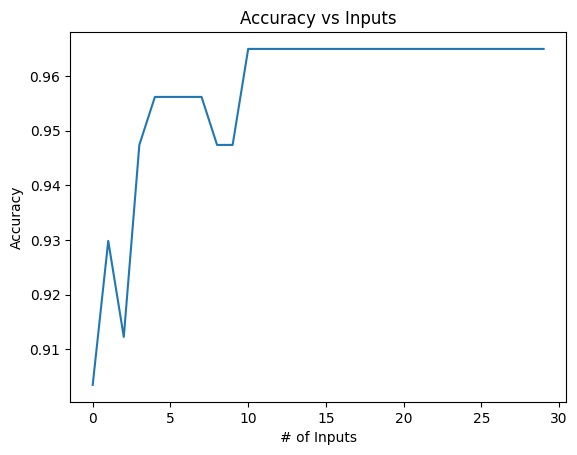

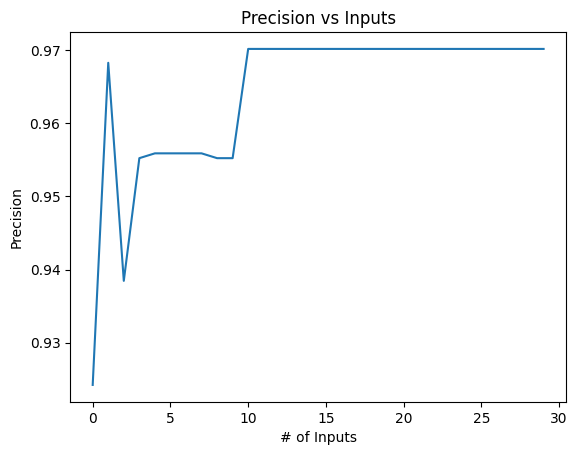

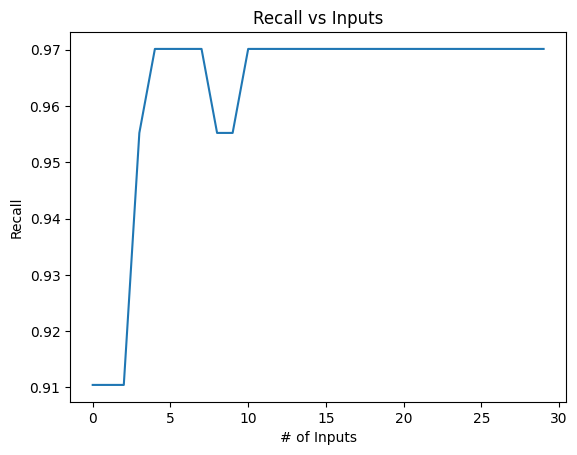

In [336]:
#Graphs
plt.plot(accuracyGraph)
plt.xlabel('# of Inputs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Inputs')
plt.show()

plt.plot(precisionGraph)
plt.xlabel('# of Inputs')
plt.ylabel('Precision')
plt.title('Precision vs Inputs')
plt.show()

plt.plot(recallGraph)
plt.xlabel('# of Inputs')
plt.ylabel('Recall')
plt.title('Recall vs Inputs')
plt.show()

In [338]:
#Problem 5
dataset = load_breast_cancer()
df_4 = pd.DataFrame(dataset.data)
df_4.head()


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [339]:
labels = dataset.target
labels = np.reshape(labels,(569,1))
cancer = np.concatenate([input,labels],axis=1)

In [340]:
cancer = pd.DataFrame(cancer)
features = dataset.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [341]:
features_label = np.append(features,'test')
cancer.columns = features_label
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,test
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [342]:
X = cancer.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]]
Y = cancer.iloc[:,30].values

#Feature Scaling for better accuracy
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

#Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [343]:
Y_pred = classifier.predict(X_test)
Y_pred[0:9]

array([0., 1., 1., 1., 1., 1., 1., 1., 1.])

In [344]:

cf_matrix = confusion_matrix(Y_test, Y_pred)
cf_matrix

array([[47,  0],
       [ 0, 67]])

In [345]:
accuracy = metrics.accuracy_score(Y_test, Y_pred)
precision = metrics.precision_score(Y_test, Y_pred)
recall = metrics.recall_score(Y_test, Y_pred)
average = (accuracy+precision+recall)/3

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("Average:",average)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Average: 1.0


In [346]:
# PCA Function

x = cancer.loc[:,features].values
y = cancer.loc[:,['test']].values

x = StandardScaler().fit_transform(x)

accuracyGraph = []
precisionGraph = []
recallGraph = []


In [347]:
# K-loop
for k in range(1,31):
  pca = PCA(n_components=k)
  principalComponents = pca.fit_transform(x)
  principalDf = pd.DataFrame(data = principalComponents, columns = [*range(1,k+1)])
  final_df = pd.concat([principalDf, cancer[['test']]], axis=1)
  outcome = final_df.pop("test")

  x2 = final_df.values
  y2 = outcome.values
  X_train, X_test, Y_train, Y_test = train_test_split(x2, y2, test_size = 0.2, random_state = 0)
  classifier.fit(X_train, Y_train)

  Y_pred = classifier.predict(X_test)
  cnf_matrix = confusion_matrix(Y_test, Y_pred)

  accuracy = metrics.accuracy_score(Y_test, Y_pred)
  accuracyGraph.append(accuracy)
  precision = metrics.precision_score(Y_test, Y_pred)
  precisionGraph.append(precision)
  recall = metrics.recall_score(Y_test, Y_pred)
  recallGraph.append(recall)
  newAverage = (accuracy+precision+recall)/3

In [348]:
pca = PCA(n_components=k)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = [*range(1,k+1)])
final_df =pd.concat([principalDf, cancer[['test']]], axis=1)

x2 = final_df.values
y2 = outcome.values
X_train, X_test, Y_train, Y_test = train_test_split(x2, y2, test_size = 0.2, random_state = 0)
classifier.fit(X_train, Y_train)

GaussianNB()

In [349]:
Y_pred = classifier.predict(X_test)
cf_matrix = confusion_matrix(Y_test, Y_pred)

print("Accuracy:",metrics.accuracy_score(Y_test,Y_pred))
print("Precision:",metrics.precision_score(Y_test,Y_pred))
print("Recall:",metrics.recall_score(Y_test,Y_pred))
print("Final k: ", k)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Final k:  30


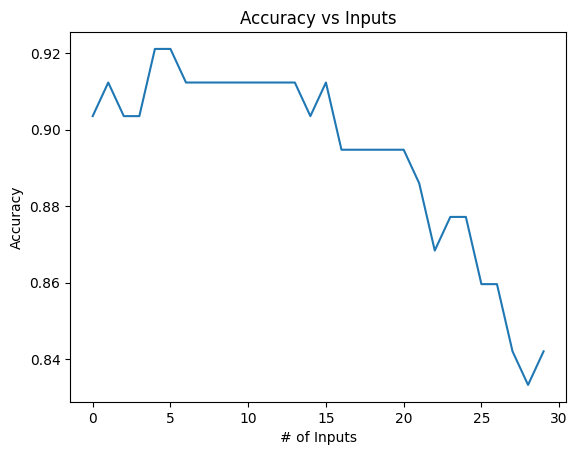

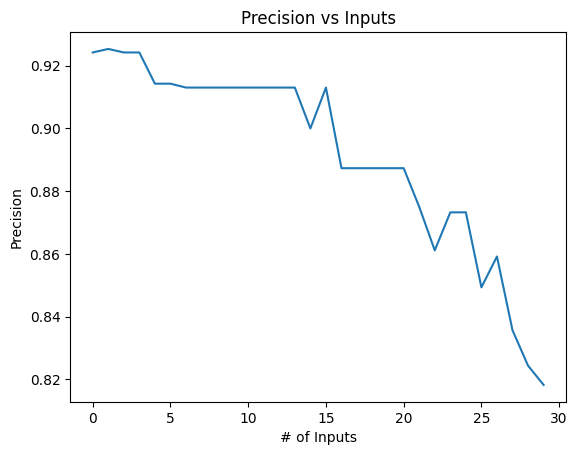

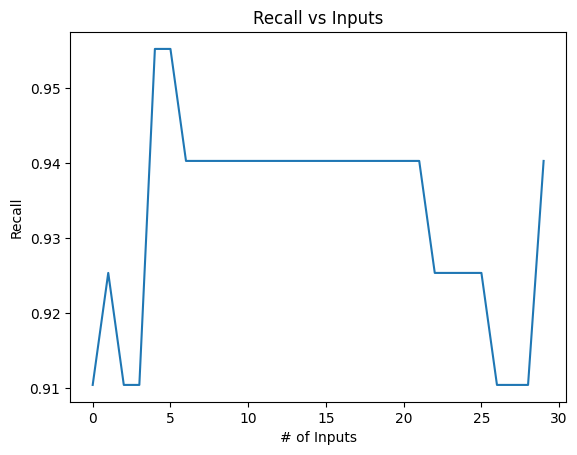

In [350]:
#Graphs
plt.plot(accuracyGraph)
plt.xlabel('# of Inputs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Inputs')
plt.show()

plt.plot(precisionGraph)
plt.xlabel('# of Inputs')
plt.ylabel('Precision')
plt.title('Precision vs Inputs')
plt.show()

plt.plot(recallGraph)
plt.xlabel('# of Inputs')
plt.ylabel('Recall')
plt.title('Recall vs Inputs')
plt.show()